In [17]:
# Music Classification - CSCI 4622 Final Project
# Giovanni Visco, Ishan Kumar, Avnish Asthana, Dhruv Patel

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.style.use('ggplot')
import librosa 
from librosa import feature
from librosa import display
genres = ['blues', 'classical','country','disco', 'hiphop', 'jazz','metal', 'pop', 'reggae', 'rock']

In [18]:
# list data
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/blues\blues.00000.au
./data/blues\blues.00001.au
./data/blues\blues.00002.au
./data/blues\blues.00003.au
./data/blues\blues.00004.au
./data/blues\blues.00005.au
./data/blues\blues.00006.au
./data/blues\blues.00007.au
./data/blues\blues.00008.au
./data/blues\blues.00009.au
./data/blues\blues.00010.au
./data/blues\blues.00011.au
./data/blues\blues.00012.au
./data/blues\blues.00013.au
./data/blues\blues.00014.au
./data/blues\blues.00015.au
./data/blues\blues.00016.au
./data/blues\blues.00017.au
./data/blues\blues.00018.au
./data/blues\blues.00019.au
./data/blues\blues.00020.au
./data/blues\blues.00021.au
./data/blues\blues.00022.au
./data/blues\blues.00023.au
./data/blues\blues.00024.au
./data/blues\blues.00025.au
./data/blues\blues.00026.au
./data/blues\blues.00027.au
./data/blues\blues.00028.au
./data/blues\blues.00029.au
./data/blues\blues.00030.au
./data/blues\blues.00031.au
./data/blues\blues.00032.au
./data/blues\blues.00033.au
./data/blues\blues.00034.au
./data/blues\blues.0

In [19]:
# load audio time series into a list using librosa.load, create list of corresponding labels
time_series = []
sampling_rates = []
labels = []
song_names = []
mfcc = []
for genre in genres:
    # identify the path using the genre
    path = './data/' + genre
    # loop through every file in the path
    for file in os.listdir(path):
        filename = path + '/' + file
        y, sr = librosa.load(filename)
        song_mfcc = librosa.feature.mfcc(y = y, sr = sr)
        
        # future changes: upload all data to csv files
        # extract all important features such as spectral bandwith, tempo, etc.
        time_series.append(y)
        sampling_rates.append(sr)
        mfcc.append(song_mfcc)
        labels.append(genre)
        song_names.append(file)

[Text(0.5, 1.0, 'Chromagram')]

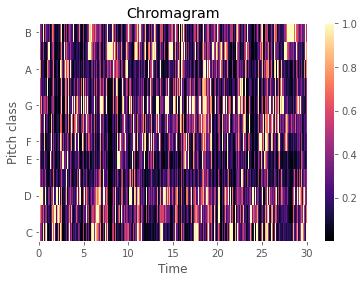

In [20]:
# attempt at feature extraction with librosa using one time series
chroma = feature.chroma_stft(y = time_series[0], sr = sampling_rates[0])
fig, ax = plt.subplots()
img = display.specshow(chroma, y_axis = 'chroma', x_axis = 'time', ax = ax)
fig.colorbar(img, ax = ax)
ax.set(title = "Chromagram")

Text(0.5, 1.0, 'hello')

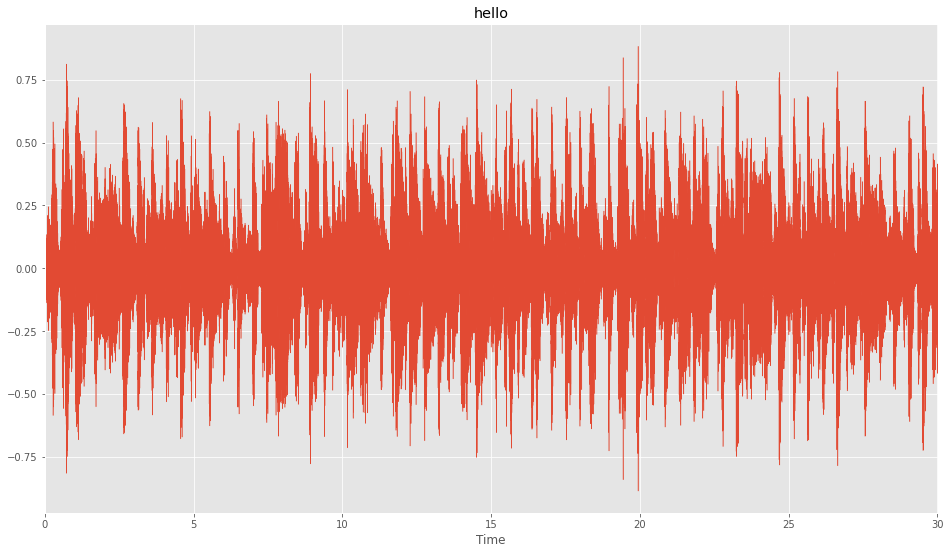

In [21]:
plt.figure(figsize=(16, 9))
librosa.display.waveplot(y = time_series[0], sr = sampling_rates[0])
plt.title("hello")

20


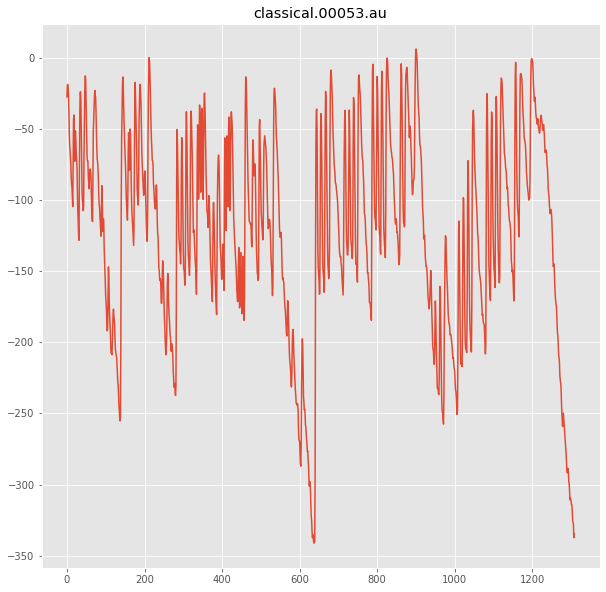

In [32]:
song_index = 153
mfccBlues = librosa.feature.mfcc(y = time_series[song_index], sr = sampling_rates[song_index])
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot( mfccBlues [0])
ax.set_title(song_names[song_index])

print(len(mfccBlues))